# Predicting Deathrate 

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

In [138]:
dataset = pd.read_csv(r"database/cancer_reg.csv")
dataset = dataset.fillna(0)
dataset

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [139]:
dataset["target_deathrate"]

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64

In [140]:
X = dataset.drop(columns=["target_deathrate", "binnedinc","pctprivatecoveragealone","geography"]).values
y = dataset["target_deathrate"]

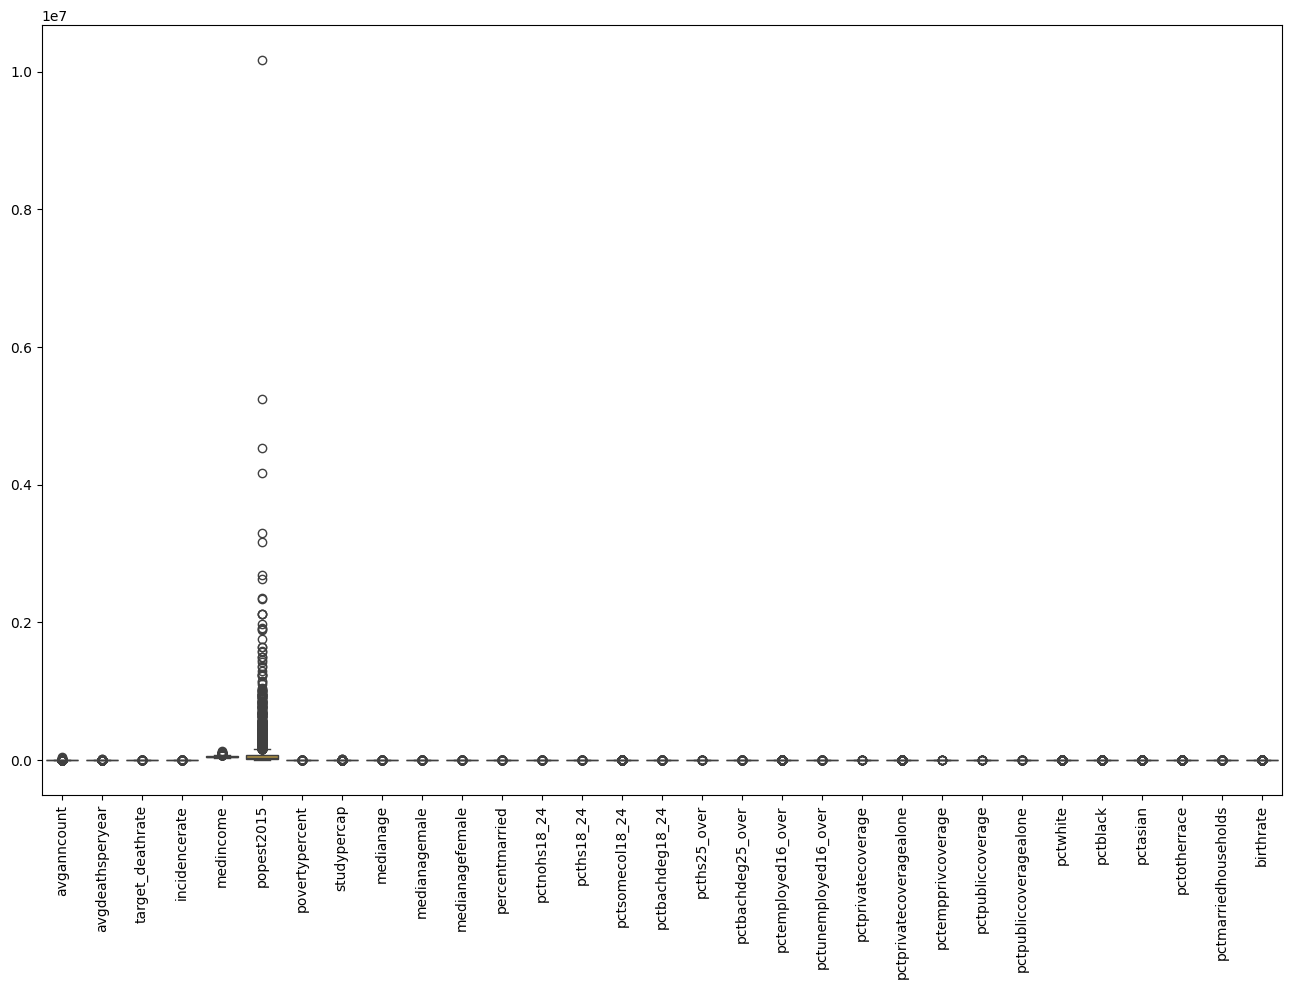

In [141]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [143]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [144]:
model = LinearRegression()
model.fit(X_scaled_train, y_train)

LinearRegression()

In [147]:
y_pred = model.predict(X_scaled_test)
y_pred

array([189.82271564, 166.62729179, 166.19827441, 188.56288641,
       185.61159841, 175.32212548, 156.62947538, 150.60458697,
       141.93660563, 166.20526219, 139.23194959, 180.66028386,
       204.30122969, 183.42801263, 174.86729238, 198.57929873,
       200.84684511, 181.57618564, 215.72693128, 182.10877965,
       202.38670385, 190.11307955, 164.30969002, 217.11977473,
       207.32813861, 190.81047664, 183.35125732, 171.23633248,
       213.7896891 , 166.95831839, 203.73211229, 166.70940704,
       217.74284425, 190.84302877, 213.52399507, 165.17206736,
       155.3996305 , 170.74697762, 191.07950535, 209.08950796,
       185.0934621 , 196.43976539, 172.48413471, 139.25187549,
       182.26790631, 183.16595389, 161.77647946, 154.68673077,
       187.47812095, 148.94250972, 207.32461787, 172.27970617,
       166.61076686, 224.3012046 , 181.49678047, 167.51487497,
       153.62022191, 181.68534656, 199.99879639, 158.9251644 ,
       218.57347072, 204.33652618, 174.2486806 , 216.57

In [148]:
y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64

In [146]:
print("Results with UNCLEANED Data")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Results with UNCLEANED Data
Mean Squared Error (MSE): 419.61288984247886
Root Mean Squared Error (RMSE): 20.484454833909513
Mean Absolute Error (MAE): 15.209522803611188
R² Score: 0.48717957583275484
